# Restaurant Data EDA

In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from glob import glob

import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("poster")

In [2]:
def time_marker(text=''):
    print('[{}] {}'.format(datetime.datetime.now().time(), text))

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import matplotlib
font = {'size' : 50}
matplotlib.rc('font', **font)

TITLE_FONT_SIZE = 25
LABEL_FONT_SIZE = 15
TICK_FONT_SIZE  = 15

FIG_SIZE = (15,6)
DO_WRITE_CHARTS = True

In [4]:
fname = '../clean_data/_analysis/us_restaurant_bids.txt'

with open(fname) as f:
    us_rest_bids = f.readlines()
us_rest_bids = [x.strip() for x in us_rest_bids] 

# Load Review Data for US Restaurants

In [5]:
time_marker(text='Loading Review Data...')

restaurants = pd.DataFrame()
file_path_slug = '../clean_data/business/*.csv'
file_list = glob(file_path_slug)

# Chunk Settings
chunks = list()
chunksize = 10000
for ii, file in enumerate(sorted(file_list)):
    time_marker('Reading {} of {} {}...'.format(ii+1, len(file_list), file))
    num_chunks = math.ceil(sum(1 for row in open(file, 'r'))/chunksize)
    format_width = len(str(num_chunks))

    # import file in chunks
    for jj, chunk in enumerate(pd.read_csv(file, chunksize=chunksize, iterator=True, index_col=0)):

        # only consider reviews for businesses that are US Restaurants
        chunk = chunk[chunk.business_id.isin(us_rest_bids)].copy()
        
        # append chunk to chunks list
        chunks.append(chunk)
        
time_marker(text='merging to dataframe...')
restaurants = pd.concat(chunks)

time_marker('reseting index...')
restaurants.reset_index(inplace=True, drop=True)
time_marker(text='Complete!')



[22:46:47.645032] Loading Review Data...
[22:46:47.662043] Reading 1 of 64 ../clean_data/business/00_-_business_clean.csv...


/Users/samgutentag/anaconda/envs/spring/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (60,61,62,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[22:46:48.832709] Reading 2 of 64 ../clean_data/business/01_0_business_clean.csv...


/Users/samgutentag/anaconda/envs/spring/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (28,60,61,62,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[22:46:49.801777] Reading 3 of 64 ../clean_data/business/02_1_business_clean.csv...


/Users/samgutentag/anaconda/envs/spring/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (28,60,61,62,63,64,65,66,77,78,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[22:46:50.619863] Reading 4 of 64 ../clean_data/business/03_2_business_clean.csv...


/Users/samgutentag/anaconda/envs/spring/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (28,40,60,61,62,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[22:46:51.409904] Reading 5 of 64 ../clean_data/business/04_3_business_clean.csv...
[22:46:52.310148] Reading 6 of 64 ../clean_data/business/05_4_business_clean.csv...
[22:46:53.209935] Reading 7 of 64 ../clean_data/business/06_5_business_clean.csv...


/Users/samgutentag/anaconda/envs/spring/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (28,60,61,62,63,64,65,66,77,78,79,80,81,82,83,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[22:46:54.034484] Reading 8 of 64 ../clean_data/business/07_6_business_clean.csv...
[22:46:54.878258] Reading 9 of 64 ../clean_data/business/08_7_business_clean.csv...
[22:46:55.702336] Reading 10 of 64 ../clean_data/business/09_8_business_clean.csv...
[22:46:56.514657] Reading 11 of 64 ../clean_data/business/10_9_business_clean.csv...
[22:46:57.342626] Reading 12 of 64 ../clean_data/business/11_A_business_clean.csv...
[22:46:58.167197] Reading 13 of 64 ../clean_data/business/12_B_business_clean.csv...
[22:46:58.972490] Reading 14 of 64 ../clean_data/business/13_C_business_clean.csv...
[22:46:59.835793] Reading 15 of 64 ../clean_data/business/14_D_business_clean.csv...
[22:47:00.669577] Reading 16 of 64 ../clean_data/business/15_E_business_clean.csv...
[22:47:01.499353] Reading 17 of 64 ../clean_data/business/16_F_business_clean.csv...
[22:47:02.363307] Reading 18 of 64 ../clean_data/business/17_G_business_clean.csv...
[22:47:03.217250] Reading 19 of 64 ../clean_data/business/18_H_busi

/Users/samgutentag/anaconda/envs/spring/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[22:47:08.214494] Reading 25 of 64 ../clean_data/business/24_N_business_clean.csv...
[22:47:09.007396] Reading 26 of 64 ../clean_data/business/25_O_business_clean.csv...
[22:47:09.836074] Reading 27 of 64 ../clean_data/business/26_P_business_clean.csv...
[22:47:10.636345] Reading 28 of 64 ../clean_data/business/27_Q_business_clean.csv...
[22:47:11.467992] Reading 29 of 64 ../clean_data/business/28_R_business_clean.csv...
[22:47:12.267126] Reading 30 of 64 ../clean_data/business/29_S_business_clean.csv...
[22:47:13.150776] Reading 31 of 64 ../clean_data/business/30_T_business_clean.csv...
[22:47:13.985500] Reading 32 of 64 ../clean_data/business/31_U_business_clean.csv...
[22:47:14.809192] Reading 33 of 64 ../clean_data/business/32_V_business_clean.csv...
[22:47:15.680123] Reading 34 of 64 ../clean_data/business/33_W_business_clean.csv...
[22:47:16.604750] Reading 35 of 64 ../clean_data/business/34_X_business_clean.csv...
[22:47:17.934368] Reading 36 of 64 ../clean_data/business/35_Y_bu

/Users/samgutentag/anaconda/envs/spring/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (60,61,62,63,64,65,66,77,78,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[22:47:32.044792] Reading 53 of 64 ../clean_data/business/52_o_business_clean.csv...
[22:47:32.862684] Reading 54 of 64 ../clean_data/business/53_p_business_clean.csv...
[22:47:33.706145] Reading 55 of 64 ../clean_data/business/54_q_business_clean.csv...
[22:47:34.532954] Reading 56 of 64 ../clean_data/business/55_r_business_clean.csv...
[22:47:35.327852] Reading 57 of 64 ../clean_data/business/56_s_business_clean.csv...
[22:47:36.170472] Reading 58 of 64 ../clean_data/business/57_t_business_clean.csv...
[22:47:36.983356] Reading 59 of 64 ../clean_data/business/58_u_business_clean.csv...
[22:47:37.833284] Reading 60 of 64 ../clean_data/business/59_v_business_clean.csv...
[22:47:38.660228] Reading 61 of 64 ../clean_data/business/60_w_business_clean.csv...
[22:47:39.482203] Reading 62 of 64 ../clean_data/business/61_x_business_clean.csv...
[22:47:40.308123] Reading 63 of 64 ../clean_data/business/62_y_business_clean.csv...
[22:47:41.154827] Reading 64 of 64 ../clean_data/business/63_z_bu

In [6]:
# drop columns of all zeros
restaurants = restaurants.loc[:, (restaurants != 0).any(axis=0)]

In [7]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19976 entries, 0 to 19975
Columns: 235 entries, business_id to wraps
dtypes: float64(28), int64(130), object(77)
memory usage: 35.8+ MB


In [8]:
restaurants.head(3)

,business_id,address,city,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,...,thai,turkish,ukrainian,uzbek,vegan,vegetarian,venezuelan,vietnamese,waffles,wraps
0,-2q4dnUw0gGJniGW2aPamQ,1805 S Neil St,Champaign,0,40.094068,-88.245785,Fiesta Ranchera,NaN,61820,4,...,0,0,0,0,0,0,0,0,0,0
1,-49WY_TEa9ZEcRk_GnuLog,5205 Detroit Rd,Sheffield Village,1,41.425861,-82.080963,Cracker Barrel Old Country Store,NaN,44054,27,...,0,0,0,0,0,0,0,0,0,0
2,--9e1ONYQuAa-CB_Rrw7Tw,3355 Las Vegas Blvd S,Las Vegas,1,36.123183,-115.169190,Delmonico Steakhouse,The Strip,89109,1389,...,0,0,0,0,0,0,0,0,0,0


In [9]:
category_columns = restaurants.columns[-128:]
cols_of_interest = ['business_id', 'name', 'review_count', 'stars', 'state']

for c in category_columns :
    cols_of_interest.append(c)


In [10]:
for c in category_columns:
    if restaurants[category_columns][c].sum() > 1000:
        print('{} {:d}'.format(str(c).rjust(25), restaurants[category_columns][c].sum()))
    

           american_(new) 1551
   american_(traditional) 2283
       breakfast_&_brunch 1204
                  burgers 2091
            chicken_wings 1013
                  chinese 1807
                fast_food 3658
                  italian 1729
                  mexican 2647
                    pizza 3082
              restaurants 19931
               sandwiches 2712


In [11]:
# limit to only businesses in these categories

categories_of_interest = ['chicken_wings','breakfast_&_brunch',
                          'american_(new)','italian','chinese',
                          'burgers','american_(traditional)',
                          'mexican','sandwiches','pizza','fast_food']

restaurants_of_interest = pd.DataFrame()
chunks = []
for cat in categories_of_interest:
    chunk = restaurants[restaurants[cat] == 1].copy()
    
    chunks.append(chunk)

restaurants_of_interest = pd.concat(chunks)


# drop columns we dont care about    
for col in restaurants_of_interest.columns:
    if col not in cols_of_interest:
        restaurants_of_interest.drop(col, axis=1, inplace=True)
    
# drop columns of all zeros
restaurants_of_interest = restaurants_of_interest.loc[:, (restaurants_of_interest != 0).any(axis=0)]   




In [12]:
restaurants_of_interest.head()

,business_id,name,review_count,stars,state,afghan,african,american_(new),american_(traditional),arabian,...,thai,turkish,ukrainian,uzbek,vegan,vegetarian,venezuelan,vietnamese,waffles,wraps
8,-sCaUNqEfFOYwtu8WCw5Wg,Anthony's Coal Fired Pizza,50,3.5,PA,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,--GM_ORV2cYS-h38DSaCLw,Mm Mm Pizza,7,4.0,PA,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52,-fbpSXmv2RhFc-h6JyC0aw,Pangea Tapas Bar & Grill,4,4.0,NC,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
58,-CZwX0Fy14DGCY_2aFkhKg,K Jun Chicken,5,3.5,NV,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59,-qqMAXJh3CIlfUr7DO0yHQ,KFC,4,1.0,OH,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
restaurants_of_interest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23777 entries, 8 to 19969
Columns: 125 entries, business_id to wraps
dtypes: float64(1), int64(121), object(3)
memory usage: 22.9+ MB


In [14]:
total = 0
for cat in categories_of_interest:
    print('{}\t{:d}'.format(cat.rjust(25), restaurants_of_interest[restaurants_of_interest[cat] == 1].shape[0]))
    total+= restaurants_of_interest[restaurants_of_interest[cat] == 1].shape[0]
print(total)
    

            chicken_wings	2562
       breakfast_&_brunch	2572
           american_(new)	2876
                  italian	3442
                  chinese	2055
                  burgers	4491
   american_(traditional)	4364
                  mexican	3542
               sandwiches	5511
                    pizza	5499
                fast_food	7441
44355


In [15]:
restaurants_of_interest.to_csv('../clean_data/_analysis/us_restaurants_business.csv', encoding='utf=8')

In [16]:
business_ids = sorted(restaurants_of_interest.business_id.unique())

destination_file = '../clean_data/_analysis/us_restaurant_bids_alt.txt'
for bid in business_ids:
    with open(destination_file, 'a') as text_file:
        print('{}'.format(bid), file=text_file)
time_marker('Finished writing to file at {}'.format(destination_file))

[22:47:58.382357] Finished writing to file at ../clean_data/_analysis/us_restaurant_bids_alt.txt


# Exploratory Data Analysis

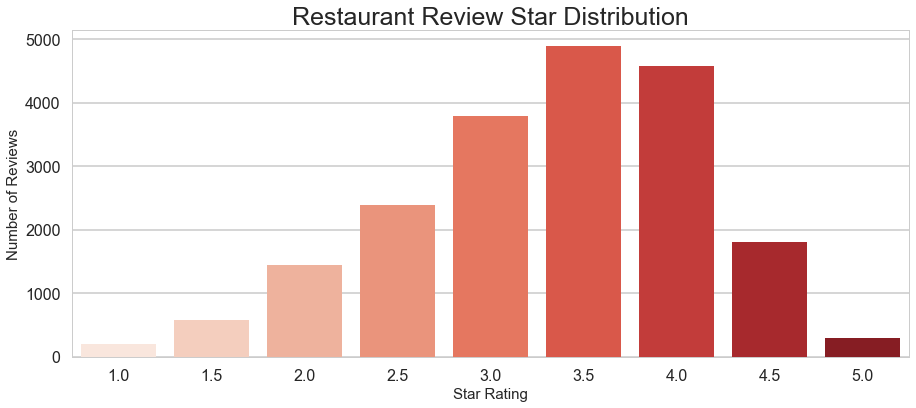

In [17]:
ax = plt.figure(figsize=FIG_SIZE)
ax = sns.countplot(x="stars", data=restaurants, palette="Reds")

ax.set_xlabel('Star Rating', size=LABEL_FONT_SIZE)
ax.set_ylabel('Number of Reviews', size=LABEL_FONT_SIZE)

title = 'Restaurant Review Star Distribution'
ax.set_title(title, size=TITLE_FONT_SIZE)

if DO_WRITE_CHARTS:
    plt.savefig('../charts/{}.png'.format(title.lower().replace(' ', '_')))
else:
    plt.show()
    plt.close()

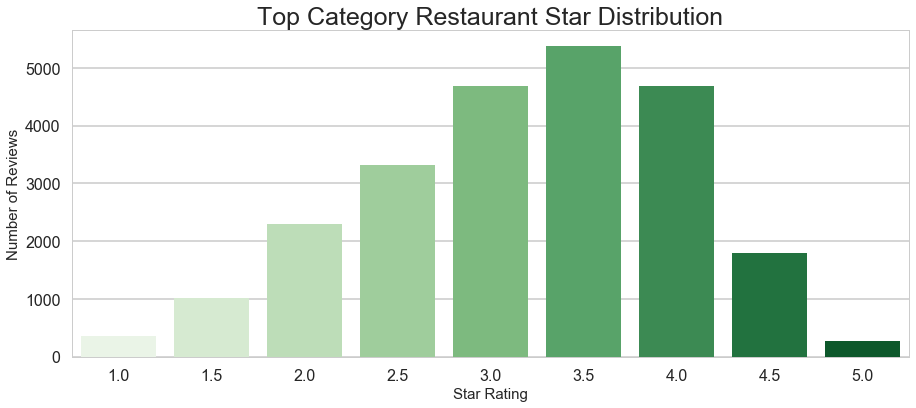

In [18]:
ax = plt.figure(figsize=FIG_SIZE)
ax = sns.countplot(x="stars", data=restaurants_of_interest, palette="Greens")

ax.set_xlabel('Star Rating', size=LABEL_FONT_SIZE)
ax.set_ylabel('Number of Reviews', size=LABEL_FONT_SIZE)

title = 'Top Category Restaurant Review Star Distribution'
ax.set_title('Top Category Restaurant Star Distribution', size=TITLE_FONT_SIZE)

if DO_WRITE_CHARTS:
    plt.savefig('../charts/{}.png'.format(title.lower().replace(' ', '_')))
else:
    plt.show()
    plt.close()